In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

In [6]:
mvc = pd.read_csv("nypd_mvc_2018.csv")

In [7]:
mvc.head()

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,motorist_injured,total_injured,pedestrians_killed,cyclist_killed,motorist_killed,total_killed,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,3869058,2018-03-23,21:40,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN,0,0,0,0.0,0,0,0,0.0,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
1,3847947,2018-02-13,14:45,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,62 STREET,NaN,0,0,0,0.0,0,0,0,0.0,SPORT UTILITY / STATION WAGON,DS,NaN,NaN,NaN,Backing Unsafely,Unspecified,NaN,NaN,NaN
2,3914294,2018-06-04,0:00,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN,0,0,1,1.0,0,0,0,0.0,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
3,3915069,2018-06-05,6:36,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,VANLOON STREET,NaN,0,0,0,0.0,0,0,0,0.0,Sedan,Sedan,NaN,NaN,NaN,Glare,Passing Too Closely,NaN,NaN,NaN
4,3923123,2018-06-16,15:45,BRONX,"(40.884727, -73.89945)",NaN,NaN,208 WEST 238 STREET,0,0,0,0.0,0,0,0,0.0,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Turning Improperly,Unspecified,NaN,NaN,NaN


In [9]:
null_count  = mvc.isnull().sum()
null_count

unique_key                 0
date                       0
time                       0
borough                20646
location                3885
on_street              13961
cross_street           29249
off_street             44093
pedestrians_injured        0
cyclist_injured            0
motorist_injured           0
total_injured              1
pedestrians_killed         0
cyclist_killed             0
motorist_killed            0
total_killed               5
vehicle_1                355
vehicle_2              12262
vehicle_3              54352
vehicle_4              57158
vehicle_5              57681
cause_vehicle_1          175
cause_vehicle_2         8692
cause_vehicle_3        54134
cause_vehicle_4        57111
cause_vehicle_5        57671
dtype: int64

In [13]:
null_count_pct  = round(null_count*100/mvc.shape[0],2)
null_count_pct

unique_key              0.00
date                    0.00
time                    0.00
borough                35.68
location                6.71
on_street              24.13
cross_street           50.55
off_street             76.20
pedestrians_injured     0.00
cyclist_injured         0.00
motorist_injured        0.00
total_injured           0.00
pedestrians_killed      0.00
cyclist_killed          0.00
motorist_killed         0.00
total_killed            0.01
vehicle_1               0.61
vehicle_2              21.19
vehicle_3              93.93
vehicle_4              98.78
vehicle_5              99.68
cause_vehicle_1         0.30
cause_vehicle_2        15.02
cause_vehicle_3        93.55
cause_vehicle_4        98.70
cause_vehicle_5        99.67
dtype: float64

In [15]:
null_df = pd.DataFrame({"null_count":null_count,"null_count_pct":null_count_pct})
null_df

,null_count,null_count_pct
unique_key,0,0.00
date,0,0.00
time,0,0.00
borough,20646,35.68
location,3885,6.71
on_street,13961,24.13
cross_street,29249,50.55
off_street,44093,76.20
pedestrians_injured,0,0.00
cyclist_injured,0,0.00


In [19]:
injured_cols = [col for col in mvc.columns if "injured" in col]
injured_cols

['pedestrians_injured', 'cyclist_injured', 'motorist_injured', 'total_injured']

In [23]:
injured = mvc[injured_cols].copy()
injured.head()

,pedestrians_injured,cyclist_injured,motorist_injured,total_injured
0,0,0,0,0.0
1,0,0,0,0.0
2,0,0,1,1.0
3,0,0,0,0.0
4,0,0,0,0.0


In [26]:
injured_manual_sum = injured[injured_cols[:-1]].sum(axis = 1)

In [31]:
mask = injured["total_injured"] != injured_manual_sum

In [35]:
injured[injured["total_injured"] != injured_manual_sum].index

Int64Index([ 1222,  3263,  3362,  3508, 10989, 12885, 13344, 15213, 20163,
            20978, 23276, 24907, 28330, 31299, 37520, 42089, 42179, 48596,
            51518, 55699, 55930, 56100],
           dtype='int64')

In [33]:
# injured["total_injured"] = injured_manual_sum

In [36]:
injured["total_injured"] = injured["total_injured"].mask(mask,injured_manual_sum)

In [43]:
killed_cols = [col for col in mvc.columns if "killed" in col]
killed_cols

['pedestrians_killed', 'cyclist_killed', 'motorist_killed', 'total_killed']

In [44]:
killed = mvc[killed_cols].copy()
killed.head()

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
0,0,0,0,0.0
1,0,0,0,0.0
2,0,0,0,0.0
3,0,0,0,0.0
4,0,0,0,0.0


In [45]:
killed_manual_sum = killed[killed_cols[:-1]].sum(axis = 1)

In [46]:
mask = killed["total_killed"] != killed_manual_sum

In [48]:
killed["total_killed"] = killed["total_killed"].mask(mask,killed_manual_sum)

In [50]:
killed.isnull().sum()

pedestrians_killed    0
cyclist_killed        0
motorist_killed       0
total_killed          0
dtype: int64

In [52]:
mvc["total_killed"] = killed["total_killed"]
mvc["total_injured"] = injured["total_injured"]

In [53]:
mvc.isnull().sum()

unique_key                 0
date                       0
time                       0
borough                20646
location                3885
on_street              13961
cross_street           29249
off_street             44093
pedestrians_injured        0
cyclist_injured            0
motorist_injured           0
total_injured              0
pedestrians_killed         0
cyclist_killed             0
motorist_killed            0
total_killed               0
vehicle_1                355
vehicle_2              12262
vehicle_3              54352
vehicle_4              57158
vehicle_5              57681
cause_vehicle_1          175
cause_vehicle_2         8692
cause_vehicle_3        54134
cause_vehicle_4        57111
cause_vehicle_5        57671
dtype: int64

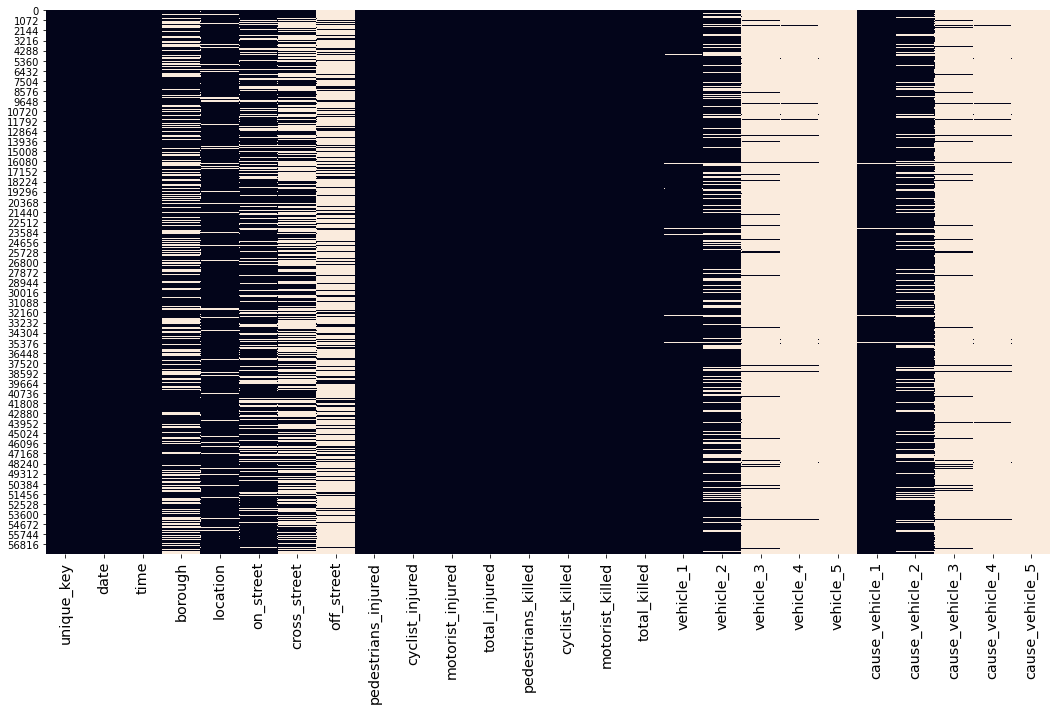

In [62]:
fig = plt.figure(figsize = (18,10))

sns.heatmap(mvc.isnull(), cbar = False)
plt.xticks(rotation = 90, size = "x-large")
plt.show()

In [71]:
mvc.isnull().sum() > 0

unique_key             False
date                   False
time                   False
borough                 True
location                True
on_street               True
cross_street            True
off_street              True
pedestrians_injured    False
cyclist_injured        False
motorist_injured       False
total_injured          False
pedestrians_killed     False
cyclist_killed         False
motorist_killed        False
total_killed           False
vehicle_1               True
vehicle_2               True
vehicle_3               True
vehicle_4               True
vehicle_5               True
cause_vehicle_1         True
cause_vehicle_2         True
cause_vehicle_3         True
cause_vehicle_4         True
cause_vehicle_5         True
dtype: bool

In [68]:
missing_cols = mvc.columns[mvc.isnull().sum() > 0]

In [69]:
missing = mvc[missing_cols].copy()
missing.isnull().sum()

borough            20646
location            3885
on_street          13961
cross_street       29249
off_street         44093
vehicle_1            355
vehicle_2          12262
vehicle_3          54352
vehicle_4          57158
vehicle_5          57681
cause_vehicle_1      175
cause_vehicle_2     8692
cause_vehicle_3    54134
cause_vehicle_4    57111
cause_vehicle_5    57671
dtype: int64

In [76]:
def plot_null_matrix(df, figsize = (18,14)):
    fig = plt.figure(figsize = figsize)
    sns.heatmap(df.isnull(), cbar = False, yticklabels = False)
    plt.xticks(rotation = 90, size = "x-large")
    plt.show()

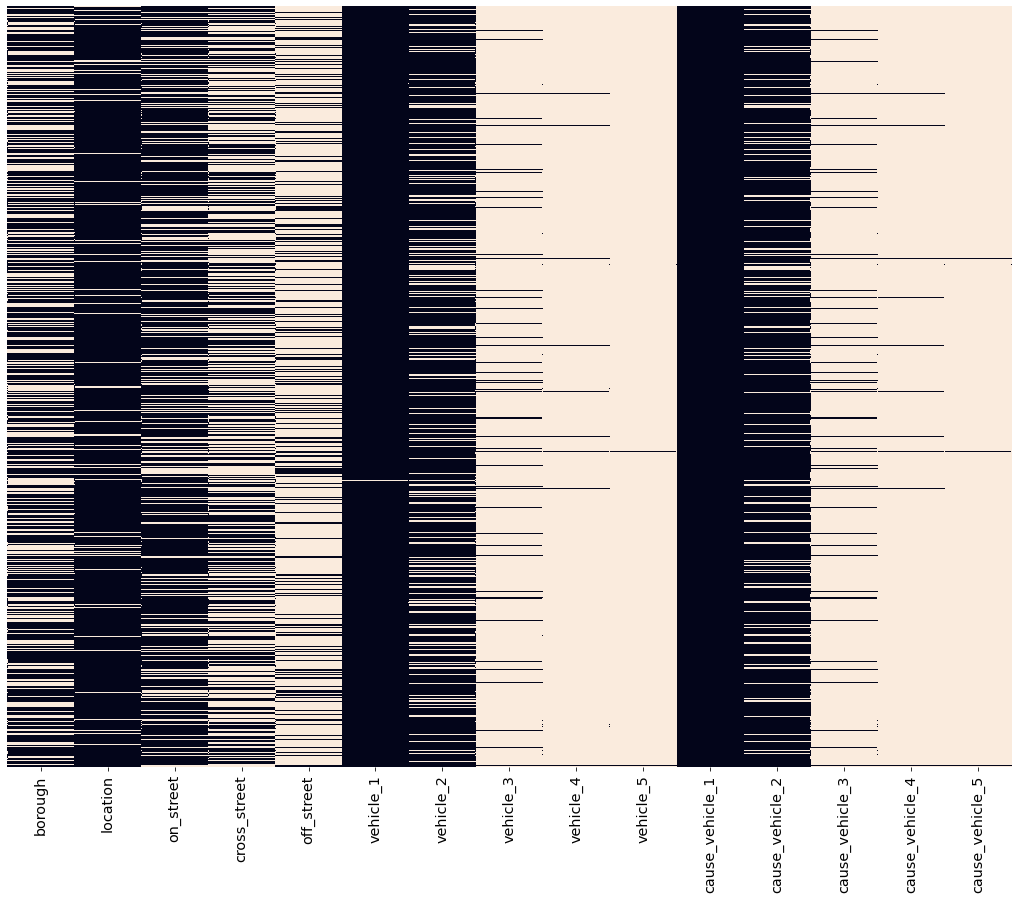

In [77]:
plot_null_matrix(missing)

In [85]:
missing_corr = missing.isnull().corr().iloc[1:,:-1]
missing_corr

,borough,location,on_street,cross_street,off_street,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4
location,0.190105,1.000000,-0.073975,-0.069719,0.084579,-0.010466,-0.033842,-0.000927,0.004655,-0.005797,-0.003458,-0.021373,0.000684,0.004604
on_street,-0.350190,-0.073975,1.000000,0.557767,-0.991030,-0.001889,0.119647,0.020867,0.004172,-0.002768,0.001307,0.087374,0.017426,0.002737
cross_street,0.409107,-0.069719,0.557767,1.000000,-0.552763,-0.017018,0.043799,-0.049910,-0.021137,-0.012003,-0.009102,0.031189,-0.052159,-0.022074
off_street,0.362189,0.084579,-0.991030,-0.552763,1.000000,0.001812,-0.121129,-0.022404,-0.004074,0.002492,-0.001738,-0.088187,-0.019120,-0.002580
vehicle_1,-0.018325,-0.010466,-0.001889,-0.017018,0.001812,1.000000,0.151516,0.019972,0.008732,0.004425,0.604281,0.180678,0.020624,0.009022
vehicle_2,-0.077516,-0.033842,0.119647,0.043799,-0.121129,0.151516,1.000000,0.131813,0.057631,0.029208,0.106214,0.784402,0.132499,0.058050
vehicle_3,-0.061932,-0.000927,0.020867,-0.049910,-0.022404,0.019972,0.131813,1.000000,0.437214,0.221585,0.014000,0.106874,0.961316,0.448525
vehicle_4,-0.020406,0.004655,0.004172,-0.021137,-0.004074,0.008732,0.057631,0.437214,1.000000,0.506810,0.006121,0.046727,0.423394,0.963723
vehicle_5,-0.010733,-0.005797,-0.002768,-0.012003,0.002492,0.004425,0.029208,0.221585,0.506810,1.000000,0.003102,0.023682,0.214580,0.490537
cause_vehicle_1,-0.012115,-0.003458,0.001307,-0.009102,-0.001738,0.604281,0.106214,0.014000,0.006121,0.003102,1.000000,0.131000,0.014457,0.006324


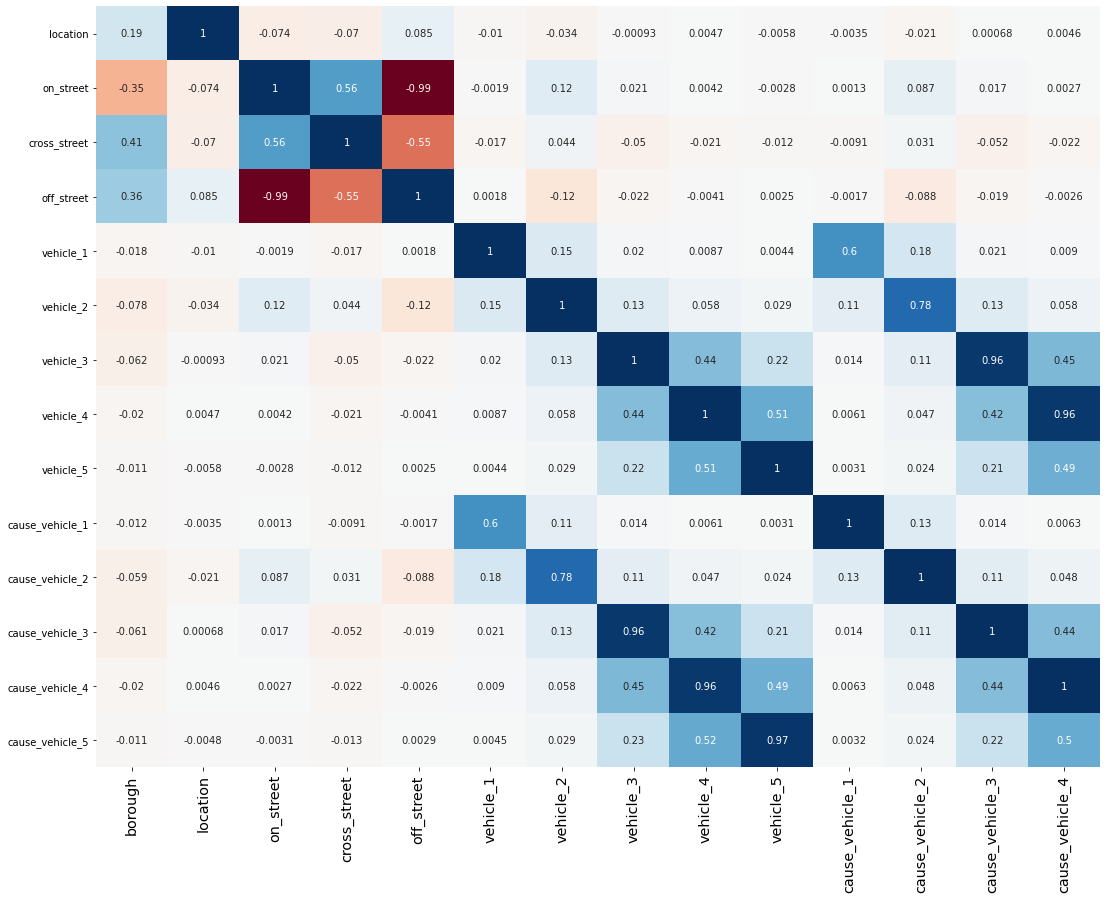

In [93]:
fig = plt.figure(figsize = (18,14))
sns.heatmap(missing_corr, cbar = False, vmin = -1, vmax = 1, cmap = "RdBu", annot = True)
plt.xticks(rotation = 90, size = "x-large")
plt.show()

In [99]:
triangle = np.triu(np.ones_like(missing_corr), k = 1)
triangle

array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

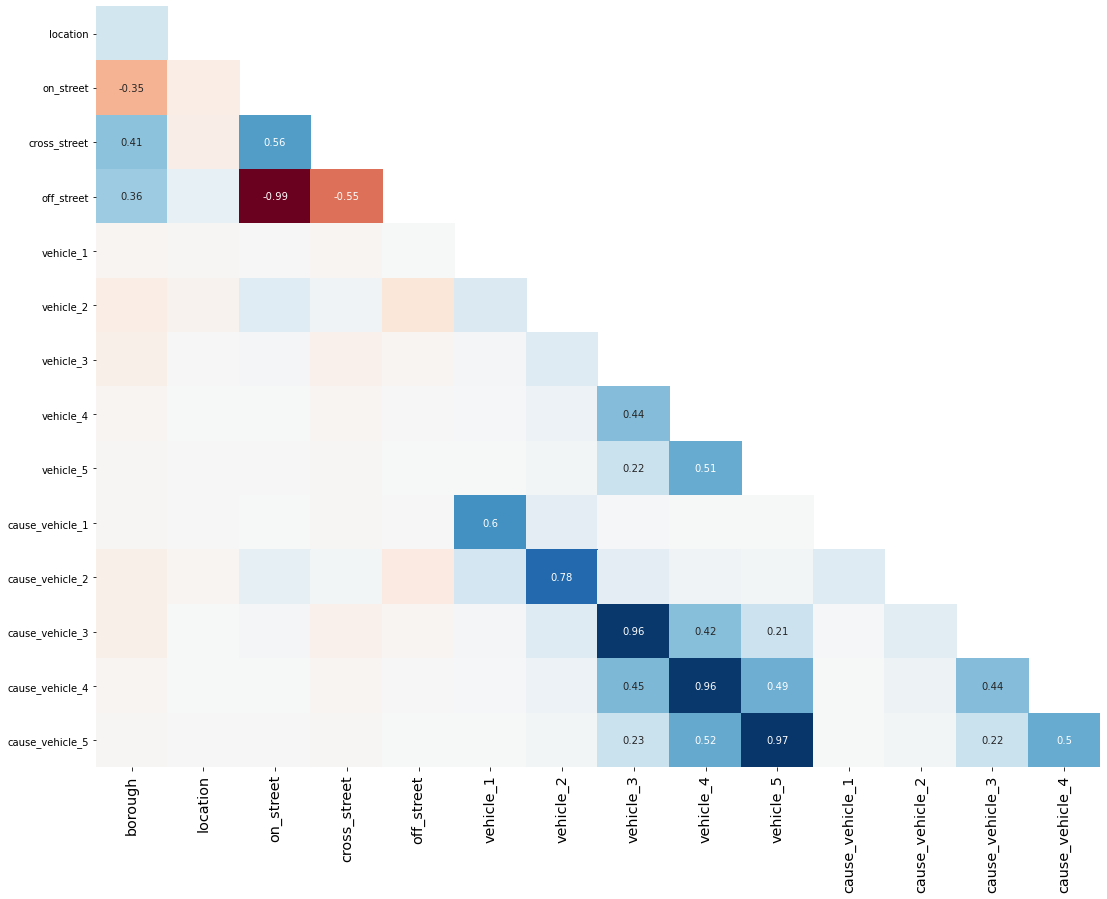

In [108]:
fig = plt.figure(figsize = (18,14))
ax = sns.heatmap(missing_corr, cbar = False, vmin = -1, vmax = 1, cmap = "RdBu", annot = True,\
           mask = triangle)
plt.xticks(rotation = 90, size = "x-large")
# print(ax.texts)

for texts in ax.texts:
    t = texts.get_text()
    t = float(t)
    if t > -0.2 and t < 0.2:
        texts.set_text("")
    else:
        texts.set_text(round(t,2))
plt.show()